In [36]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 100

def gaussian(x , s, x_o, x_1):
    g1 = 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -(x - x_o)**2 / ( 2. * s**2 ) )
    g2 = 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -(x - x_1)**2 / ( 2. * s**2 ) ) 
    return (g1+g2)

x = np.linspace(-2,2,Nx)

dist = gaussian(x,0.35,-1,1)
uniform_samples = np.random.uniform(0, 1,Nx)
cdf = np.cumsum(dist)

# Use inverse transform sampling to map uniform samples to your distribution
collocation_points = np.interp(uniform_samples, cdf / cdf[-1], x)
domain = np.convolve(collocation_points,x,mode='same')

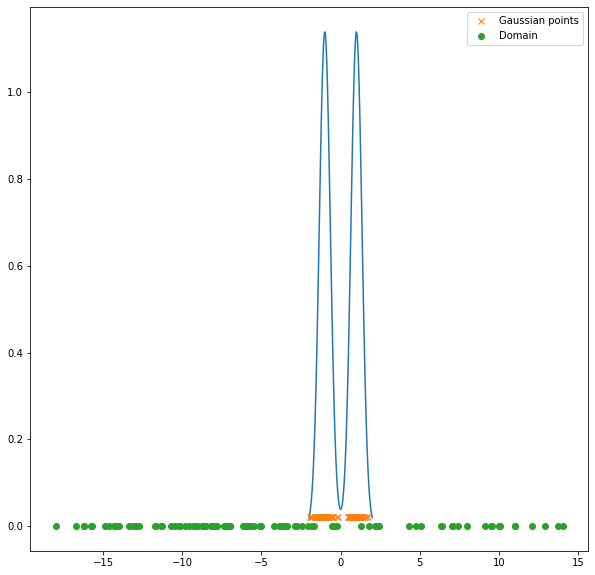

In [37]:
plt.figure(figsize=(10,10))
plt.plot(x,dist)
plt.plot(collocation_points,np.zeros(len(collocation_points))+0.02,'x',alpha = 1,label = 'Gaussian points')
plt.plot(domain,np.zeros(len(domain)),'o',alpha = 1,label = 'Domain')
plt.legend()

In [28]:
A = np.array([1, 2, 3, 4, 5])
B = np.array([0.5, 1.0, 0.5])

C = np.convolve(A, B, mode='same')
C



array([2., 4., 6., 8., 7.])